# Tarea 8
> Carlos Enmanuel Oliveri Martinez  
> 5234661

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
class Vertice:
  def __init__(self,x):
    self.clave = x
    self.vecinos = []
    self.dist = 0
    self.color = 'blanco'
    self.padre = None

class Grafos:
  def __init__(self):
    self.vertices = []

  def agregarVertice(self,n):
    self.vertices.append(n)

  def agregarAristas(self,a,b,c):
    a.vecinos.append((b,c))
    b.vecinos.append((a,c))

  def mostrarGrafos(self):
    G = nx.Graph()
    for u in self.vertices:
      for v in u.vecinos:
        G.add_edge(u.clave,v[0].clave)
    nx.draw_circular(G,with_labels = True)
    plt.show()

  def mayorDist(self,s):
    global maxDist, objet
    for u in self.vertices:
      u.padre = None
      u.color = 'blanco'
      u.dist = 0
    maxDist = 0
    s.color = 'gris'
    fila = Cola()
    fila.agregar(s)
    while not fila.vacia():
      u = fila.quitar()
      for v in u.vecinos:
        if v[0].color == 'blanco':
          v[0].color = 'gris'
          v[0].padre = u
          v[0].dist = u.dist + v[1]
          if maxDist < v[0].dist:
            maxDist = v[0].dist
            objet = v[0]
          fila.agregar(v[0])
      u.color = 'negro'
    return maxDist,objet

  # Devuelve el vecino mas cercano al vertice enviado,
  #utilizado para generar el MST
  def menorDistVecino(self,u):
    minDist = 1000
    objet = None
    for v in u.vecinos:
      if v[0].color == 'blanco':
        if minDist > v[1]:
          minDist = v[1]
          objet = v
    return objet

  def createMst(self):
    for v in self.vertices:
      v.padre = None
      v.color = 'blanco'
      v.dist = 0
    mst = []
    u = self.vertices[0]
    u.color = 'gris'
    mst.append((None,u,0))
    while len(mst) < len(self.vertices):
      objet = (None,None,1000)
      for v in mst:
        vecinoMenorDistancia = self.menorDistVecino(v[1])
        #print(v[1].clave,vecinoMenorDistancia[0].clave,vecinoMenorDistancia[1])
        try:
          if vecinoMenorDistancia[1] < objet[2]:
            objet = (v[1],vecinoMenorDistancia[0],vecinoMenorDistancia[1])
        except:
          pass
      objet[1].color = 'gris'
      objet[1].padre = objet[0]
      mst.append(objet)
    return mst

class Cola:
  def __init__(self):
    self.elementos = []
  def quitar(self):
    if len(self.elementos) == 0:
      print("Cola vacia!!!")
      return None
    return self.elementos.pop(0)
  def agregar(self,elementoNuevo):
    self.elementos.append(elementoNuevo)
  def vacia(self):
    if len(self.elementos) == 0:
      return True

#Esta funcion busca un Vertice a partir de su Clave
def buscarCiudad(ciudad,u):
  for j in u.vertices:
    if j.clave == ciudad:
      return j #Devuelve el objeto si lo encuentra
  return False #Si no lo encuentra devuelve False

In [12]:
g1 = Grafos() #Creamos un Grafo Vacio
n = 0
while n <= 1 or n != int(n):
  #Validacion de tipo de entrada
  try:
    n = int(input("Ingrese el numero de vertices del Grafo: "))
  except:
    print("Valor no valido intente de nuevo")
for k in range(0,n-1):
  print("ingrese el valor de dos ciudades y la distancia entre ellas tal que 1 2 3")
  entrada = input()
  # validacion de formato de entrada / no esta del todo bien validado
  while len(entrada) != 5:
    print('Entrada invalida vuelva a intentar: "1 2 3"')
    entrada = input()
  entrada = entrada.split()
  if (buscarCiudad(entrada[0],g1) == False):
    g1.agregarVertice(Vertice(entrada[0]))
  if (buscarCiudad(entrada[1],g1) == False):
    g1.agregarVertice(Vertice(entrada[1]))
  g1.agregarAristas(buscarCiudad(entrada[0],g1),buscarCiudad(entrada[1],g1),int(entrada[2]))
algo = g1.createMst()
algo
MSTree = Grafos()
v1 = Vertice('1')
MSTree.agregarVertice(v1)
for k in algo:
  if k[0] == None:
    pass
  else:
    if (buscarCiudad(k[0].clave,MSTree) == False):
      MSTree.agregarVertice(Vertice(k[0].clave))
    if (buscarCiudad(k[1].clave,MSTree) == False):
        MSTree.agregarVertice(Vertice(k[1].clave))
    MSTree.agregarAristas(buscarCiudad(k[0].clave,MSTree),buscarCiudad(k[1].clave,MSTree),k[2])
sum = 0
for k in algo:
  sum = sum + k[2]
print("La suma de aristas del srbol de expansion minima es: ",sum)

Ingrese el numero de vertices del Grafo: 1 2 3
Valor no valido intente de nuevo
Ingrese el numero de vertices del Grafo: 2 3 1
Valor no valido intente de nuevo
Ingrese el numero de vertices del Grafo: 1 3 5
Valor no valido intente de nuevo
Ingrese el numero de vertices del Grafo: 4
ingrese el valor de dos ciudades y la distancia entre ellas tal que 1 2 3
1 2 3
ingrese el valor de dos ciudades y la distancia entre ellas tal que 1 2 3
2 3 1
ingrese el valor de dos ciudades y la distancia entre ellas tal que 1 2 3
1 3 5
La suma de aristas del srbol de expansion minima es:  4


In [13]:
print("los vertices que componen el arbol de expancion minima en orden son: ")
for k in algo:
  if k[0] == None:
    print(0,k[1].clave,k[2])
  else:
    print(k[0].clave,k[1].clave,k[2])

los vertices que componen el arbol de expancion minima en orden son: 
0 1 0
1 2 3
2 3 1


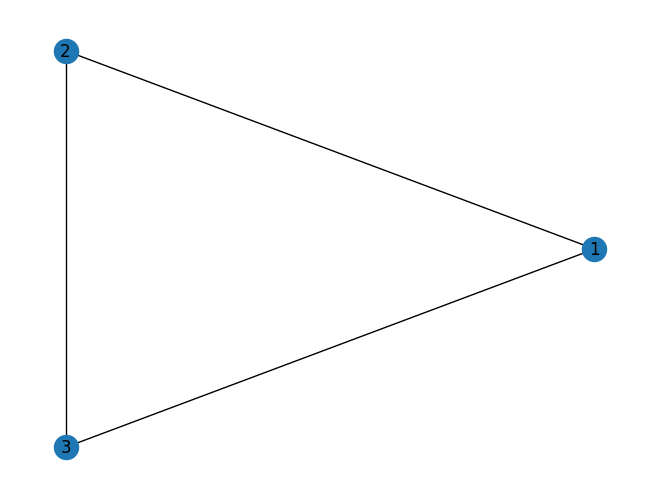

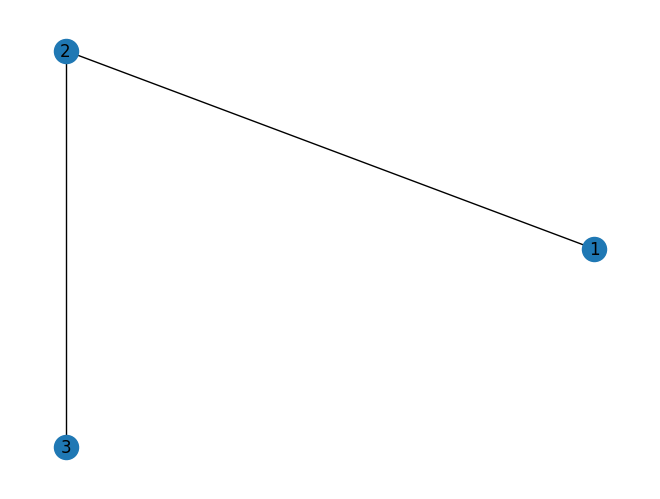

In [14]:
g1.mostrarGrafos()
MSTree.mostrarGrafos()